## Speciation, extinction and hybridization rates

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import os, scipy
import warnings
import collections as col
import pandas as pd
import seaborn as sns
from numpy import exp
from matplotlib import rc
from scipy import stats
from heapq import nsmallest
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
warnings.simplefilter('ignore')
plt.rcParams['mathtext.fontset'] = 'cm'

In [2]:
font = {'family':'sans-serif','weight':'regular', 'style':'normal','size':18,'sans-serif':['Trebuchet MS'] }
rc('font', **font)
rc('text', usetex=True) 
plt.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]
plt.rcParams['legend.title_fontsize'] = 18

In [3]:
gen=2000; TT=np.linspace(2,gen,int(gen-1),dtype=int); runs=50
labels = ['uncoupled', 's_175', 's_125', 's_075','s_025']
labels2 = [r'$NI$',r'$\sigma_w=0.175$',r'$\sigma_w=0.125$', r'$\sigma_w=0.075$',r'$\sigma_w=0.025$']
labels3 = [r'$NI$',r'$0.175$',r'$0.125$', r'$0.075$',r'$0.025$']
colorlist=['r','m','tab:orange','g','b']
case=[x for x in labels]

In [4]:
TT2=np.linspace(1,gen,int(gen),dtype=int)
size=(runs,len(TT)); size2=(runs,len(TT2))
igt_all=np.zeros(size2); 
sp_all=np.zeros(size); sp_acc=np.zeros(size2)
ext_all=np.zeros(size2); hyb_all=np.zeros(size2)

# igtavg=[[0]]*len(case); igtstd=[[0]]*len(case)
spavg=[[0]]*len(case);  spstd=[[0]]*len(case)
extavg=[[0]]*len(case); extstd=[[0]]*len(case)
hybavg=[[0]]*len(case); hybstd=[[0]]*len(case)
acavg=[[0]]*len(case);  acstd=[[0]]*len(case)

for c in range(len(case)):
    path = "./"+case[c]
    igtf_aux=[]
    for i in range(runs):
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]  
        
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("number0.dat")][0]
        inp = open (arr_txt+'/'+y)
        igtaux=[]; igtaux.append(1) # let igtaux same lenght as tvector_e and tvector_h (starting at t=1)
        for line in inp.readlines():
            p=line.split()
            igtaux.append(int(p[1]))
        inp.close()
        igt_all[i]=igtaux
        
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("ext-sizes.dat")][0]
        inp = open (arr_txt+'/'+y)
        line = inp.readline(); p=line.split()
        igtf_aux.append(int(p[0]))
        tvector_e=[0]*len(TT2);tvector_h=[0]*len(TT2);
        for line in inp.readlines()[1:]:
            p=line.split()
            aux1=int(p[1]); aux2=int(p[2])
            if(aux2==-1.0):
                tvector_e[gen-aux1]+=1
            elif(aux2!=0):
                tvector_h[gen-aux1]+=1
        inp.close()
        
        eacum=[0]*len(TT2); eacum[0]=tvector_e[0]
        hacum=[0]*len(TT2); hacum[0]=tvector_h[0]
        sp_ac=[0]*len(TT2); sp_ac[0]=igtaux[0]+tvector_e[0]+tvector_h[0]-1
        for k in range(1,len(TT2)):
            eacum[k]=eacum[k-1]+tvector_e[k]
            hacum[k]=hacum[k-1]+tvector_h[k]
            sp_ac[k]=igtaux[k]+eacum[k]+hacum[k]-1
        ext_all[i]=eacum; hyb_all[i]=hacum;
        sp=[0]*len(TT); sp[0]=0
        for t in range(len(TT)):
            sp[t]=sp_ac[t+1]-sp_ac[t]
        sp_all[i]=sp; sp_acc[i]=sp_ac
#     igtavg[c] = igt_all.mean(axis=0); igtstd[c] = igt_all.std(axis=0)
    spavg[c] = sp_all.mean(axis=0);   spstd[c] = sp_all.std(axis=0)
    extavg[c] = ext_all.mean(axis=0); extstd[c] = ext_all.std(axis=0)
    hybavg[c] = hyb_all.mean(axis=0); hybstd[c] = hyb_all.std(axis=0)
    acavg[c] = sp_acc.mean(axis=0); acstd[c] = sp_acc.std(axis=0)
    
igt_all=np.zeros(size); dist_all=np.zeros(size);
igtavg=[[0]]*len(case); igtstd=[[0]]*len(case)
distavg=[[0]]*len(case); diststd=[[0]]*len(case)

for c in range(len(case)):
    path = "./"+case[c]
    for i in range(runs): #runs
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]
        y = [x for x in os.listdir(arr_txt) if x.endswith("number0.dat")][0]
        inp = open (arr_txt+'/'+y)
        igtaux=[]; distaux=[];
        for line in inp.readlines():
            p=line.split()
            igtaux.append(float(p[1]))
            distaux.append(float(p[2]))
        inp.close()
        igt_all[i]=igtaux; dist_all[i]=distaux;
    igtavg[c] = igt_all.mean(axis=0); igtstd[c] = igt_all.std(axis=0)
    distavg[c] = dist_all.mean(axis=0); diststd[c] = dist_all.std(axis=0)

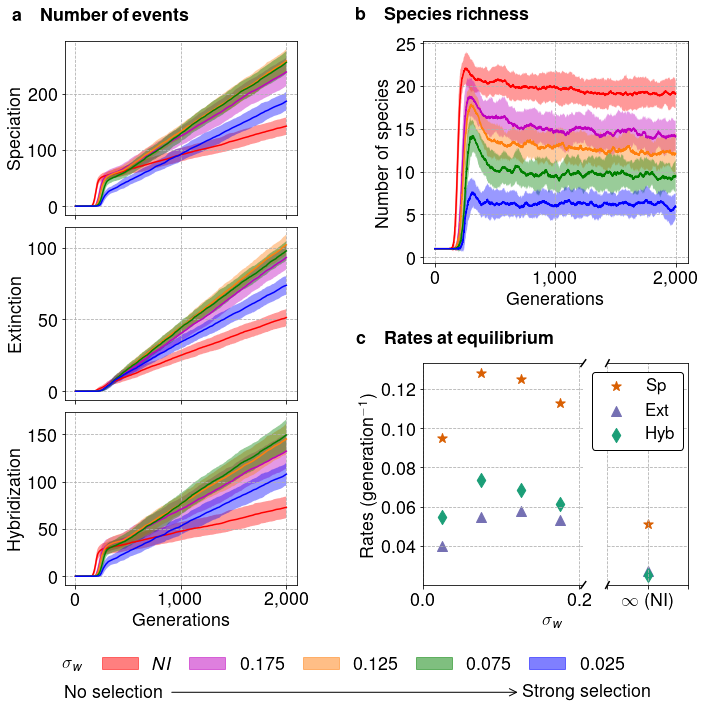

In [5]:
tmin=500
rates = ['Sp', 'Ext', 'Hyb']
clist = ['#d95f02','#7570b3','#1b9e77']
mark = ['*','^', 'd']

plt.rcParams.update(  {'figure.figsize': (9.2,10)})
fig = plt.figure(constrained_layout=False)

gs1 = fig.add_gridspec(3,1, left=0.05, right=0.40, hspace=0.07) #wspace=0.05
gs2 = fig.add_gridspec(2,2,left=0.59, right=0.99, hspace=0.45,width_ratios=[2,1])
gs3 = fig.add_gridspec(1,1,left=0.05, right=0.98,top=0, bottom=-0.04)

sprate=[0]*len(case); extrate=[0]*len(case); hybrate=[0]*len(case)

box=[]
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1],sharex=ax1)
ax3 = fig.add_subplot(gs1[2],sharex=ax1)

for c in range(len(case)):
    
    ax1.plot(TT2,acavg[c],c=colorlist[c],label=labels2[c])
    ax1.grid(linestyle='--')
    ax1.fill_between(TT2, acavg[c]+acstd[c], acavg[c]-acstd[c], facecolor=colorlist[c], alpha=0.4)
    ax1.set_ylabel('Speciation')
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    
    ax2.plot(TT2,extavg[c],c=colorlist[c])
    ax2.fill_between(TT2, extavg[c]+extstd[c], extavg[c]-extstd[c], facecolor=colorlist[c], alpha=0.4)
    ax2.set_ylabel('Extinction')
    ax2.grid(linestyle='--')
    box.append(mpatches.Patch(color=colorlist[c],alpha=0.5,edgecolor = colorlist[c],label=labels3[c]))
    plt.setp(ax2.get_xticklabels(), visible=False)

    
    ax3.plot(TT2,hybavg[c],c=colorlist[c])
    ax3.fill_between(TT2, hybavg[c]+hybstd[c], hybavg[c]-hybstd[c], facecolor=colorlist[c], alpha=0.4)
    ax3.set_ylabel('Hybridization')
    ax3.set_xlabel('Generations')
    ax3.grid(linestyle='--')
    ax3.set_xticks([0,1000,2000])
    ax3.set_xticklabels(['{:,}'.format(int(xx)) for xx in ax3.get_xticks().tolist()])
    

axs = fig.add_subplot(gs2[0,:])
for c in range(len(case)):
    axs.plot(TT,igtavg[c],c=colorlist[c],label=labels2[c]) #c=cmap(c)
    axs.fill_between(TT, igtavg[c]+igtstd[c], igtavg[c]-igtstd[c], facecolor=colorlist[c], alpha=0.4)
    axs.grid(linestyle='--')
axs.set_xticks([0,1000,2000])
axs.set_xticklabels(['{:,}'.format(int(xx)) for xx in axs.get_xticks().tolist()])
axs.set_ylabel('Number of species')
axs.set_xlabel('Generations')


a1 = fig.add_subplot(gs2[1,0])
a2 = fig.add_subplot(gs2[1,1],sharey=a1)
xplot= [5, 0.175, 0.125, 0.075, 0.025]
for c in range(len(case)):
    x=TT2[tmin:]; 
    y=acavg[c][tmin:]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    sprate[c]=slope
    a1.scatter(xplot[c],slope,c=clist[0],marker=mark[0],s=100)
    r1=a2.scatter(xplot[c],slope,c=clist[0],label=rates[0],marker=mark[0],s=100)

    y=extavg[c][tmin:]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    extrate[c]=slope
    a1.scatter(xplot[c],slope,c=clist[1],marker=mark[1],s=100)
    r2=a2.scatter(xplot[c],slope,c=clist[1],label=rates[1],marker=mark[1],s=100)

    y=hybavg[c][tmin:]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    hybrate[c]=slope
    a1.scatter(xplot[c],slope,c=clist[2],marker=mark[2],s=100)
    r3=a2.scatter(xplot[c],slope,c=clist[2],label=rates[2],marker=mark[2],s=100)
plt.legend((r1, r2, r3), rates,bbox_to_anchor=(1.05, 1), scatterpoints=1,fontsize=17,frameon=True,edgecolor='k',framealpha=1,columnspacing=0.7)
d1 = .015 # how big to make the diagonal lines in axes coordinates
d2 = .022
kwargs = dict(transform=a1.transAxes, color='k', clip_on=False)
a1.plot((1-d1,1+d1), (-d1,+d1), **kwargs)
a1.plot((1-d1,1+d1),(1-d1,1+d1), **kwargs)
a1.grid(linestyle='--')
kwargs.update(transform=a2.transAxes)
a2.plot((-d2,+d2), (1-d1,1+d1), **kwargs)
a2.plot((-d2,+d2), (-d1,+d1), **kwargs)
a1.set_xlim(0, 0.205)
a2.set_xlim(4.95, 5.05)
a2.grid(linestyle='--')
a1.spines['right'].set_visible(False)
a2.spines['left'].set_visible(False)
a2.tick_params(labelleft=False,left=False)
name = [item.get_text() for item in a2.get_xticklabels()]
name[1] = r'$\infty$ (NI)'
a2.set_xticklabels(name)
a1.set_ylabel(r'Rates (generation$^{-1}$)')
a2.set_xlabel(r'$\sigma_w$')
a2.xaxis.set_label_coords(-0.7, -0.12)


fig.text(0.49, 0.91, r"$\bf{b \quad Species \: richness}$ ")
fig.text(0.49, 0.46, r"$\bf{c \quad Rates \: at \: equilibrium}$ ")
fig.text(-0.03, 0.91, r"$\bf{a \quad Number \: of \: events}$")

ax = fig.add_subplot(gs3[0])
ax.axis('off')
an1 = ax.annotate("No selection", xy=(0, 0.40), va="center", ha="left")
an2 = ax.annotate("Strong selection", xy=(0.17, 0.40), xytext=(0.95, 0.40), va="center", ha="right",arrowprops=dict(arrowstyle="<-"))


fig.patch.set_facecolor('xkcd:white')
fig.text(0.045, 0.01, r"$\sigma_w$ ")
legend=fig.legend(handles=box, loc="lower center", bbox_to_anchor=(0.5, -0.02),ncol=5, frameon=False,columnspacing=1)#, title=r'$\sigma_w$') 
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
# fig.savefig('./Figuras/Fig2.pdf',transparent=True,bbox_inches='tight')

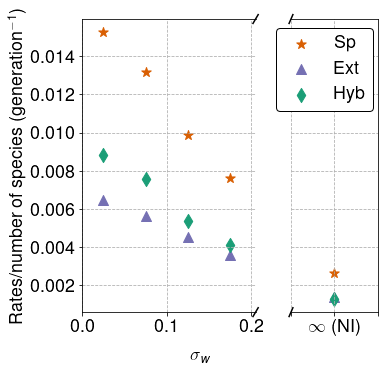

In [7]:
nsp=[0]*len(case)
for c in range(len(case)):
    y=igtavg[c][tmin-1:]
    nsp[c]=np.mean(y)

f, ax = plt.subplots(1,2, sharey='col',figsize=(5.5,5), gridspec_kw={'width_ratios': [2, 1]})
for c in range(len(case)):
    ax[0].scatter(xplot[c],sprate[c]/nsp[c],c=clist[0],marker=mark[0],s=100)
    r1=ax[1].scatter(xplot[c],sprate[c]/nsp[c],c=clist[0],label=rates[0],marker=mark[0],s=100)

    ax[0].scatter(xplot[c],extrate[c]/nsp[c],c=clist[1],marker=mark[1],s=100)
    r2=ax[1].scatter(xplot[c],extrate[c]/nsp[c],c=clist[1],label=rates[1],marker=mark[1],s=100)

    ax[0].scatter(xplot[c],hybrate[c]/nsp[c],c=clist[2],marker=mark[2],s=100)
    r3=ax[1].scatter(xplot[c],hybrate[c]/nsp[c],c=clist[2],label=rates[2],marker=mark[2],s=100)
plt.legend((r1, r2, r3), rates,bbox_to_anchor=(1.05, 1), scatterpoints=1,fontsize=18,frameon=True,edgecolor='k',framealpha=1,columnspacing=0.3)
d1 = .015 # how big to make the diagonal lines in axes coordinates
d2 = .022
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((1-d1,1+d1), (-d1,+d1), **kwargs)
ax[0].plot((1-d1,1+d1),(1-d1,1+d1), **kwargs)
ax[0].grid(linestyle='--')
kwargs.update(transform=ax[1].transAxes)
ax[1].plot((-d2,+d2), (1-d1,1+d1), **kwargs)
ax[1].plot((-d2,+d2), (-d1,+d1), **kwargs)
ax[0].set_xlim(0, 0.205)
ax[1].set_xlim(4.95, 5.05)
ax[1].grid(linestyle='--')
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].tick_params(labelleft=False,left=False)

name = [item.get_text() for item in ax[1].get_xticklabels()]
name[1] = r'$\infty$ (NI)'
ax[1].set_xticklabels(name)
f.tight_layout()
ax[0].set_ylabel('Rates/number of species (generation$^{-1}$)')
f.text(0.5, 0, r'$\sigma_w$', ha='center', va='center')
plt.show()


# f.savefig('./Figuras/supp_ratio.pdf',transparent=True,bbox_inches='tight')

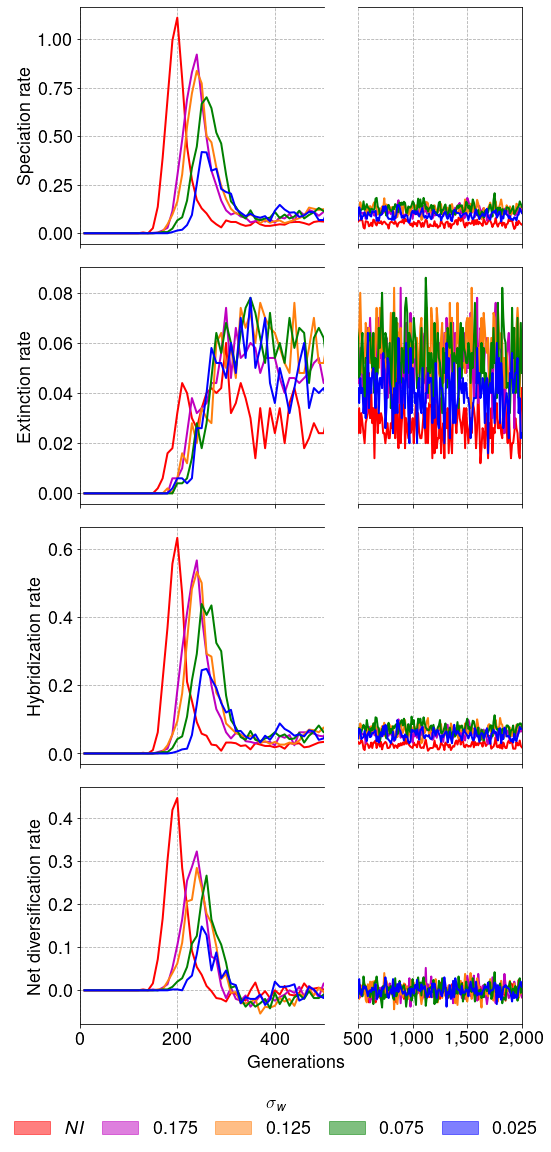

In [9]:
plt.rcParams["figure.figsize"] = [8,15]

interval = 10;
interval_e=10;
newlen=int(len(TT2)/interval)
newlen_e=int(len(TT2)/interval_e)
newTT=np.linspace(1,newlen,newlen,dtype=int)
newTT_e=np.linspace(1,newlen_e,newlen_e,dtype=int)
size=(runs,newlen); 
sp_bin=np.zeros(size);hyb_bin=np.zeros(size);
size=(runs,newlen_e); 
ext_bin=np.zeros(size); 
    
bins_fig, ax = plt.subplots(4,2,sharex='col',sharey='row',gridspec_kw={'width_ratios':[6.7,4.5]})# ,gridspec_kw={'width_ratios':[6.5,4.5]}

box=[]
for c in range(len(case)):
    path = "./"+case[c]
    for i in range(runs):
        tac1 = [0]*newlen; tac2 = [0]*newlen; tac3 = [0]*newlen_e; tac4 = [0]*newlen; #1-> all events of speciation #2-> extant #3-> extinct #4-> hybrid
        tvector_e=[0]*len(TT2); tvector_h=[0]*len(TT2); 
        counter=str(i+1).zfill(2)
        arr_txt = path+'/'+[x for x in os.listdir(path) if x.startswith("run_"+counter)][-1]      
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("ext-sizes.dat")][0]
        inp = open (arr_txt+'/'+y)      
        for line in inp.readlines()[1:]:
            p=line.split()
            aux1=int(p[1]); aux2=int(p[2])
            if(aux2==-1.0):
                tvector_e[gen-aux1]+=1
            elif(aux2!=0):
                tvector_h[gen-aux1]+=1
        inp.close()
        
        igtaux=[]; igtaux.append(1) # let igtaux same lenght as tvector_e and tvector_h (starting at t=1)
        y = [x for x in os.listdir("./"+arr_txt) if x.endswith("number0.dat")][0]
        inp = open (arr_txt+'/'+y)
        for line in inp.readlines():
            p=line.split()
            igtaux.append(int(p[1]))
        inp.close()
        
        eacum=[0]*len(TT2); eacum[0]=tvector_e[0]
        hacum=[0]*len(TT2); hacum[0]=tvector_h[0]
        sp=[0]*len(TT2); sp[0]=0
        sp_ac=[0]*len(TT2); sp_ac[0]=igtaux[0]+tvector_e[0]+tvector_h[0]
        for k in range(1,len(TT2)):
            eacum[k]=eacum[k-1]+tvector_e[k]
            hacum[k]=hacum[k-1]+tvector_h[k]
            sp_ac[k]=igtaux[k]+eacum[k]+hacum[k]
        for t in range(1,len(TT2)):
            sp[t]=sp_ac[t]-sp_ac[t-1]        
        
        for m in range(newlen):
            for n in range(interval):
                tac1[m]+=sp[m*interval+n]
                tac2[m]+=igtaux[m*interval+n]
#                 tac3[m]+=tvector_e[m*interval+n]         
                tac4[m]+=tvector_h[m*interval+n]
        sp_bin[i]=tac1; hyb_bin[i]=tac4
    
        for m in range(newlen_e):
            for n in range(interval_e):
                tac3[m]+=tvector_e[m*interval_e+n]
        ext_bin[i]=tac3;
    sp_med = sp_bin.mean(axis=0); sp_std = sp_bin.std(axis=0)
    hyb_med = hyb_bin.mean(axis=0); hyn_std = hyb_bin.std(axis=0)
    ext_med = ext_bin.mean(axis=0); ext_std = ext_bin.std(axis=0)
    
    ax[0,0].plot(newTT*interval,sp_med/interval,c=colorlist[c],linewidth=2)
    ax[0,0].set_ylabel(r'Speciation rate') #(generation$^{-1}$)
    ax[0,0].grid(linestyle='--')
    ax[0,0].set_xlim([0,500])
    ax[0,0].spines['right'].set_visible(False)
    plt.setp(ax[0,0].get_xticklabels(), visible=False)
    ax[0,1].plot(newTT*interval,sp_med/interval,c=colorlist[c],linewidth=2)
    ax[0,1].grid(linestyle='--')
    ax[0,1].set_xlim([500,2000])
    ax[0,1].spines['left'].set_visible(False)
    ax[0,1].tick_params(labelleft=False,left=False)
    plt.setp(ax[0,1].get_xticklabels(), visible=False)
    
    ax[1,0].plot(newTT_e*interval_e,ext_med/interval,c=colorlist[c],linewidth=2)
    ax[1,0].set_ylabel(r'Extinction rate')
    ax[1,0].grid(linestyle='--')
    ax[1,0].set_xlim([0,500])
    ax[1,0].spines['right'].set_visible(False)
    plt.setp(ax[1,0].get_xticklabels(), visible=False)
    ax[1,1].plot(newTT_e*interval_e,ext_med/interval,c=colorlist[c],linewidth=2)
    ax[1,1].grid(linestyle='--')
    ax[1,1].set_xlim([500,2000])
    ax[1,1].spines['left'].set_visible(False)
    ax[1,1].tick_params(labelleft=False,left=False)
    plt.setp(ax[1,1].get_xticklabels(), visible=False)
    
    ax[2,0].plot(newTT*interval,hyb_med/interval,c=colorlist[c],linewidth=2)
    ax[2,0].set_ylabel(r'Hybridization rate')
    ax[2,0].set_xlim([0,500])
    ax[2,0].spines['right'].set_visible(False)
    ax[2,0].grid(linestyle='--')
    ax[2,1].plot(newTT*interval,hyb_med/interval,c=colorlist[c],linewidth=2)
    ax[2,1].set_xlim([500,2000])
    ax[2,1].spines['left'].set_visible(False)
    ax[2,1].tick_params(labelleft=False,left=False)
    ax[2,1].grid(linestyle='--')
    plt.setp(ax[2,1].get_xticklabels(), visible=False)

    
    net=sp_med-ext_med-hyb_med
    ax[3,0].plot(newTT*interval,net/interval,c=colorlist[c],linewidth=2)
    ax[3,0].set_ylabel(r'Net diversification rate')
    ax[3,0].set_xlim([0,500])
    ax[3,0].spines['right'].set_visible(False)
    ax[3,0].grid(linestyle='--')
    ax[3,1].plot(newTT*interval,net/interval,c=colorlist[c],linewidth=2)
    ax[3,1].set_xlim([500,2000])
    ax[3,1].spines['left'].set_visible(False)
    ax[3,1].tick_params(labelleft=False,left=False)
    ax[3,1].grid(linestyle='--')
    ax[3,1].set_xticklabels(['{:,}'.format(int(xx)) for xx in ax[3,1].get_xticks().tolist()])
    box.append(mpatches.Patch(color=colorlist[c],alpha=0.5,edgecolor = colorlist[c],label=labels3[c]))
    
# plt.subplots_adjust(wspace=-5)
bins_fig.text(0.45, 0, r'Generations')
bins_fig.tight_layout()
legend=bins_fig.legend(handles=box, loc="lower center", bbox_to_anchor=(0.5, -0.08),ncol=5,title=r'$\sigma_w$', frameon=False,columnspacing=1)
plt.show()
# bins_fig.savefig('./Figuras/supp_rates.pdf',transparent=True,bbox_inches='tight')